In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
# print(os.getcwd())
# os.chdir('../')
print(os.getcwd())

/home/axquaris/StackedCapsuleAutoencoders


In [64]:
with open('scae/save.pkl', 'rb') as input:
    capsule = pickle.load(input)
    rec = pickle.load(input)

In [65]:
print(capsule.keys())
print(rec.keys())

dict_keys(['poses', 'features', 'presences', 'presence_logits', 'img_embedding'])
dict_keys(['raw_templates', 'mixture_means', 'mixture_logits', 'pdf'])


In [83]:
import colorsys
colors = []
num_templates = rec.raw_templates.shape[0]
for idx in range(num_templates):
    h = idx / num_templates
    colors.append(colorsys.hsv_to_rgb(h,1,1))
colors = torch.tensor(colors).unsqueeze(-1).unsqueeze(-1).cuda()

In [116]:
batch_idx = 0

print('colors:', colors.shape)
print('raw_templates:', rec.raw_templates.shape)

colored_templates = colors * rec.raw_templates
template_grid = colored_templates.reshape(4, 4, 3, 11, 11).permute(0, 1, 3, 4, 2).cpu().detach().numpy()

print('tts:', rec.mixture_means.shape)

colored_tts = colors * rec.mixture_means[batch_idx][:-1]
tt_grid = colored_tts.reshape(4, 4, 3, 40, 40).permute(0, 1, 3, 4, 2).cpu().detach().numpy()

print('mixture_logits:', rec.mixture_logits.shape)

composed_tts = torch.zeros(40, 40, 3)
color_tts = colored_tts.permute(0, 2, 3, 1).cpu().detach()
pres, _ = rec.pdf.mixing_prob[batch_idx, :-1].exp().max(dim=1)
pres = pres.cpu().detach()

for idx, tt in enumerate(color_tts):
    for i in range(40):
        for j in range(40):
            if torch.norm(composed_tts[i][j]) < torch.norm(tt[i][j]* pres[idx][i][j]) :
                composed_tts[i][j] = tt[i][j] * pres[idx][i][j]
composed_tts = composed_tts.numpy()

colors: torch.Size([16, 3, 1, 1])
raw_templates: torch.Size([16, 1, 11, 11])
tts: torch.Size([500, 17, 1, 40, 40])
mixture_logits: torch.Size([500, 17, 1, 40, 40])


In [106]:
rec.pdf.mixing_prob.shape

torch.Size([500, 17, 1, 40, 40])

In [95]:
def grid(X):
    plt.figure()
    num_plot = 4
    fig, ax = plt.subplots(num_plot, num_plot)
    for i in range(num_plot):
        for j in range(num_plot):
            idx = np.random.randint(0, X.shape[0])
            ax[i, j].imshow(X[i][j])
            ax[i, j].get_xaxis().set_visible(False)
            ax[i, j].get_yaxis().set_visible(False)
    fig.subplots_adjust(hspace=.1)  # No horizontal space between subplots
    fig.subplots_adjust(wspace=-.65)
    fig.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

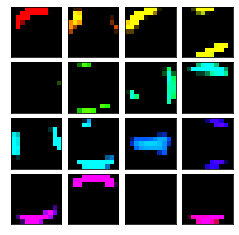

<Figure size 432x288 with 0 Axes>

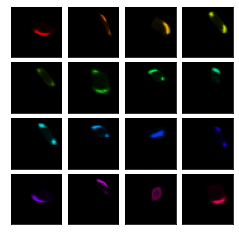

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


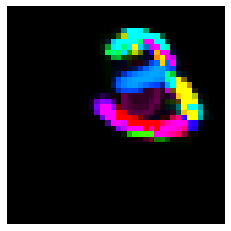

(-0.5, 39.5, 39.5, -0.5)

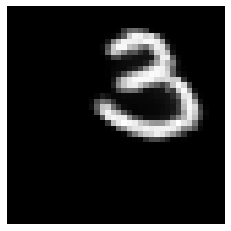

In [117]:
grid(template_grid)
grid(tt_grid)
plt.show()

plt.imshow(composed_tts)
plt.axis('off')
plt.show()

plt.imshow(rec.pdf.mean(batch_idx).permute(1,2,0).detach().cpu(), cmap='gray')
plt.axis('off')